# Social Media Engagement Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
social = pd.read_csv(r'data\social media interactions.csv')
df = social.copy()
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


## Exploratory data analysis

In [3]:
df.shape

(7050, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Check for `missing` values in dataset

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

There are 4 redundant columns in the dataset. I will drop them before proceeding further.

In [6]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Check for `duplicate` rows in dataset

In [8]:
df.duplicated().sum()

51

I will delete the duplicate rows.

In [9]:
df.drop_duplicates(inplace=True)

`Data Summary`

In [10]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 3 categorical variables in the dataset. I will explore them one by one.

In [11]:
print(f"Number of unique users who interacted: {len(df['status_id'].unique())}")
print(f"Number of unique times of when someone interacted: {len(df['status_published'].unique())}")
print(f"The types of people's posts are {', '.join(map(str, df['status_type'].unique()))}.")
print(f"Number of types of posts that people are making: {len(df['status_type'].unique())}")

Number of unique users who interacted: 6997
Number of unique times of when someone interacted: 6913
The types of people's posts are video, photo, link, status.
Number of types of posts that people are making: 4


I will drop `status_id` because its just an unique identifier of the social media users. Also for now I will drop `status_published` having date and time components since I am not treating the data as a time series data, thus I cannot use it directly for making the model. Later on I might perform certain feature engineering techniques on it to separate certain information such as days or months from it if required later. The variable `status_type` is relevant to the model since it gives the type of post people are making, so I will keep it.

In [12]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

## Interactions Analysis

I will investigate the distribution of different reactions (likes, loves, wows, hahas, sads, angrys) and understand which emotions are most prevalent among users.

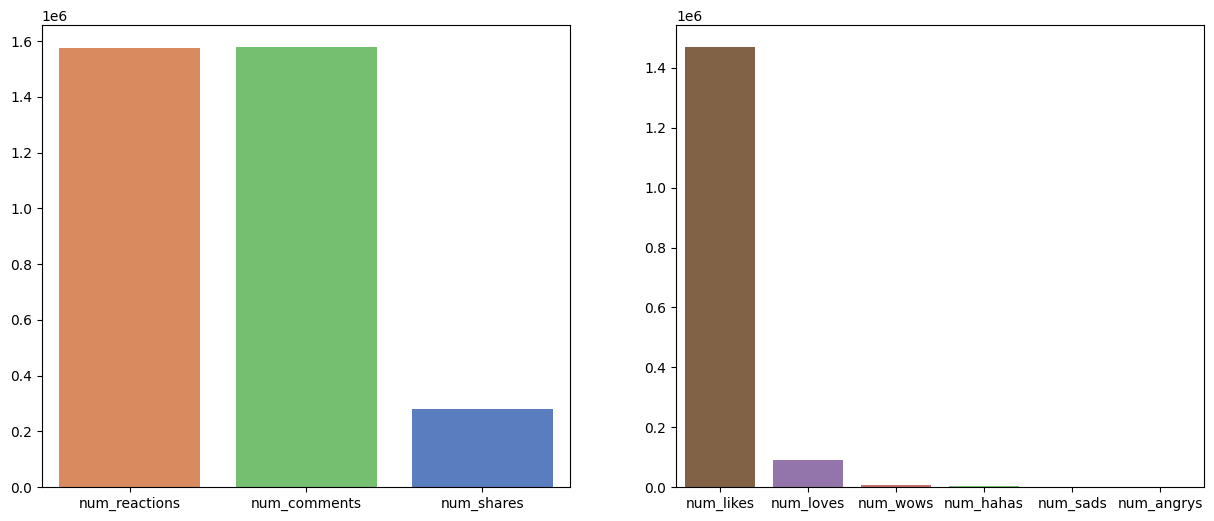

In [13]:
interactions = df[["num_reactions", "num_comments", "num_shares"]].sum()
react_types = df[["num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]].sum()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x=interactions.index, y=interactions, hue=interactions, palette="muted", legend=False, ax=ax1)
sns.barplot(x=react_types.index, y=react_types, hue=react_types, palette="muted", legend=False, ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

plt.show()

## Status type analysis

In [14]:
type = df["status_type"].value_counts()
type

status_type
photo     4244
video     2333
status     359
link        63
Name: count, dtype: int64

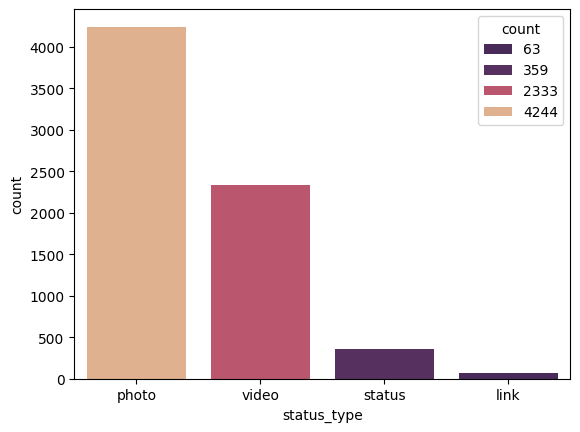

In [15]:
sns.barplot(x=type.index, y=type, hue=type, palette="flare_r")
plt.show()

The number of shares is considerably lower than reactions and comments. The domain reaction type is likes over any other types like loves, wows etc.